### imports

In [149]:
import polars as pl
from polars import col as c
import os
import matplotlib.pyplot as plt
import numpy as np

### constants

In [3]:
DATA_DIR = "dataset"

### data

In [4]:
path = os.path.join("../", DATA_DIR, "train.csv")
train = pl.read_csv(path).with_columns(
    c("pickup_date").str.to_datetime("%Y-%m-%d %H:%M:%S")
)
path = os.path.join("../", DATA_DIR, "validation.csv")
validation = pl.read_csv(path).with_columns(
    c("pickup_date").str.to_datetime("%Y-%m-%d %H:%M:%S")
)
train.sample()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
f64,f64,str,f64,datetime[μs],str,str
3.8566,231.536,"""MKPFX""",12132.1,2021-05-27 04:42:00,"""QWBPO""","""HBILN"""


### statistics

In [9]:
train.describe()

statistic,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
str,f64,f64,str,f64,str,str,str
"""count""",296727.0,296727.0,"""296727""",296647.0,"""296727""","""296727""","""296727"""
"""null_count""",0.0,0.0,"""0""",80.0,"""0""","""0""","""0"""
"""mean""",5.221752,454.873515,null,23157.860583,null,null,null
"""std""",2.979281,447.267275,null,12562.164968,null,null,null
"""min""",1.2884,24.7801,"""GJROY""",4800.95,"""2019-11-10 10:42:00""","""ANCVH""","""ANCVH"""
"""25%""",3.5225,184.7843,null,12433.25,null,null,null
"""50%""",4.5741,303.982,null,19050.0,null,null,null
"""75%""",6.0186,548.732,null,37755.5,null,null,null
"""max""",248.973,2876.4469,"""MKPFX""",190050.0,"""2022-09-05 20:42:00""","""ZYKLC""","""ZYKLC"""


In [10]:
train["transport_type"].value_counts()

transport_type,count
str,u32
"""GJROY""",17604
"""MKPFX""",275748
"""KFEGT""",3375


### graphs

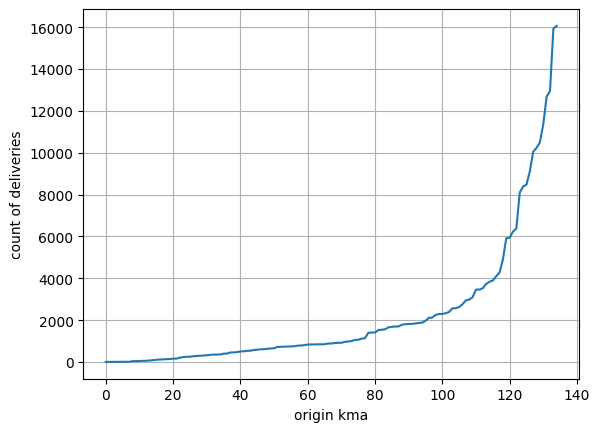

In [131]:
# there are few extremely popular kma
# the rest are rarely used

kma_statistics = train["origin_kma"].value_counts().sort("count")
plt.plot(kma_statistics["count"])
plt.xlabel("origin kma")
plt.ylabel("count of deliveries")
plt.grid()

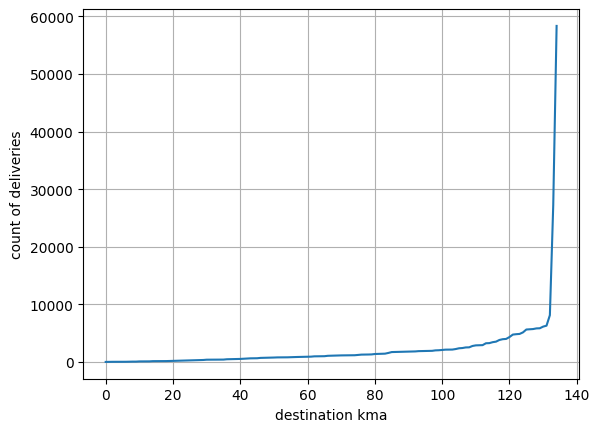

In [14]:
# there are few extremely popular kma
# the rest are rarely used

kma_statistics = train["destination_kma"].value_counts().sort("count")
plt.plot(kma_statistics["count"])
plt.xlabel("destination kma")
plt.ylabel("count of deliveries")
plt.grid()

In [16]:
train.head()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
f64,f64,str,f64,datetime[μs],str,str
4.7203,521.8451,"""MKPFX""",9231.75,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
4.9005,532.6675,"""MKPFX""",11754.95,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
4.7018,523.9188,"""MKPFX""",9603.2,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
4.6388,562.8296,"""MKPFX""",8789.05,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""
5.0206,519.8782,"""MKPFX""",9597.5,2019-11-10 10:42:00,"""OMUOI""","""LFUHN"""


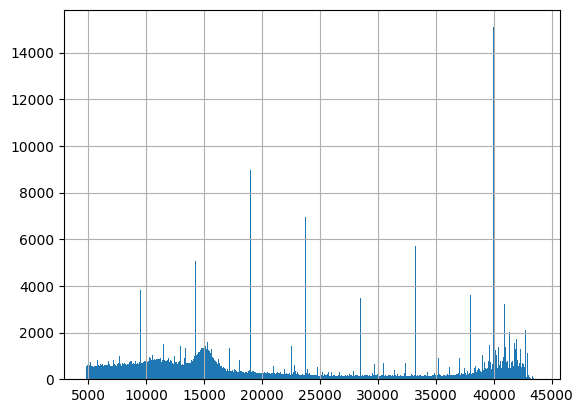

In [23]:
# weight is almost evenly distributed

weight_statistics = train.filter(c("weight") < c("weight").quantile(0.999))
plt.hist(weight_statistics["weight"], bins=500)
plt.grid()

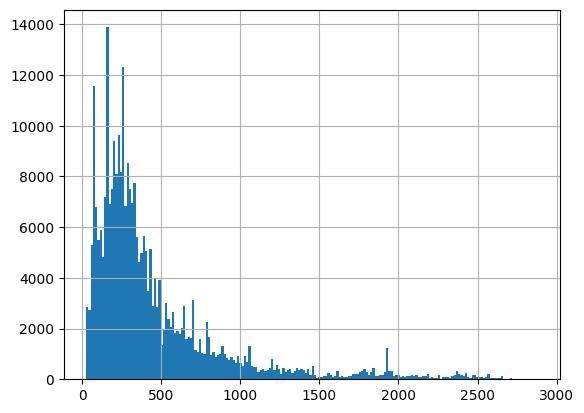

In [27]:
# valid_miles is lognormal

plt.hist(train["valid_miles"], bins=200)
plt.grid()

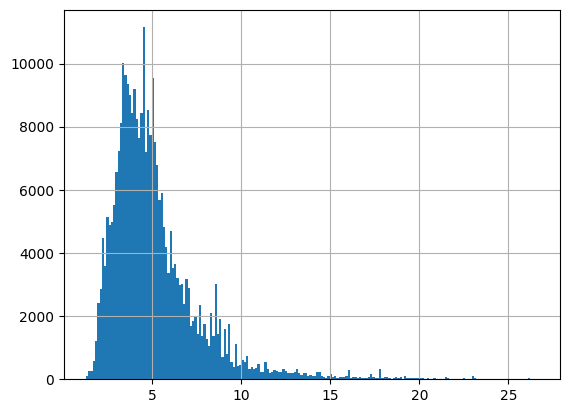

In [29]:
# valid_miles is lognormal

rate_statistics = train.filter(c("rate") < c("rate").quantile(0.999))
plt.hist(rate_statistics["rate"], bins=200)
plt.grid()

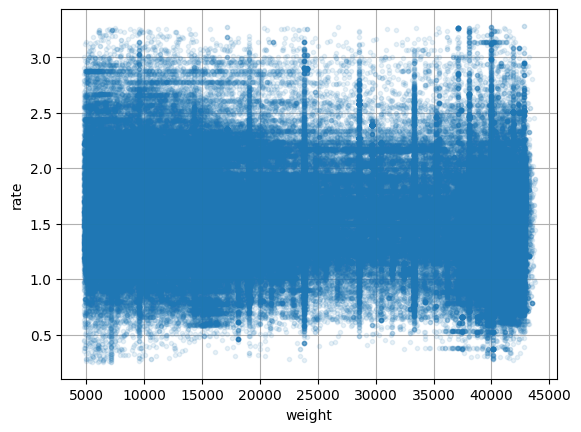

In [207]:
def myround(x, base=500):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("weight") < c("weight").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="weight",
            values=list(map(myround, weight_rate_stats["weight"].to_list())),
        ),
    )
    .group_by("weight")
    .agg(c("rate").median())
    .sort("weight")
)
plt.plot(weight_rate_stats["weight"], weight_rate_stats["rate"].log(), ".", alpha=0.1)
# plt.plot(weight_rate_stats_grouped["weight"], weight_rate_stats_grouped["rate"], ".")
plt.xlabel("weight")
plt.ylabel("rate")
plt.grid()

In [152]:
train.sample()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma,hour
f64,f64,str,f64,datetime[μs],str,str,i8
4.782,785.65,"""GJROY""",41850.0,2022-08-04 03:42:00,"""NTODX""","""VCEUE""",3


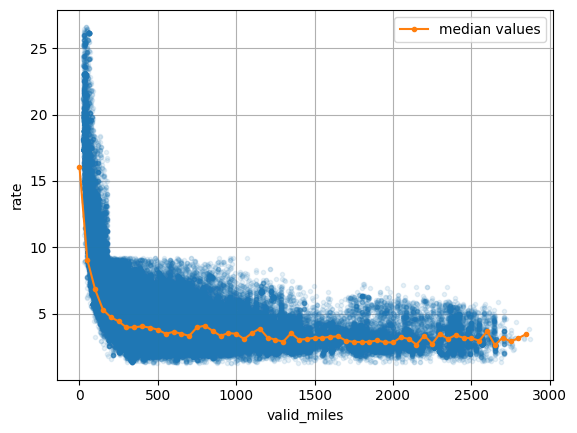

In [164]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("weight") < c("valid_miles").quantile(0.999),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="valid_miles",
            values=list(map(myround, weight_rate_stats["valid_miles"].to_list())),
        ),
    )
    .group_by("valid_miles")
    .agg(c("rate").median())
    .sort("valid_miles")
)
plt.plot(
    weight_rate_stats["valid_miles"],
    weight_rate_stats["rate"],
    ".",
    alpha=0.1,
)
plt.plot(
    weight_rate_stats_grouped["valid_miles"],
    weight_rate_stats_grouped["rate"],
    ".-",
    label="median values",
)
plt.xlabel("valid_miles")
plt.ylabel("rate")
plt.legend()
plt.grid()

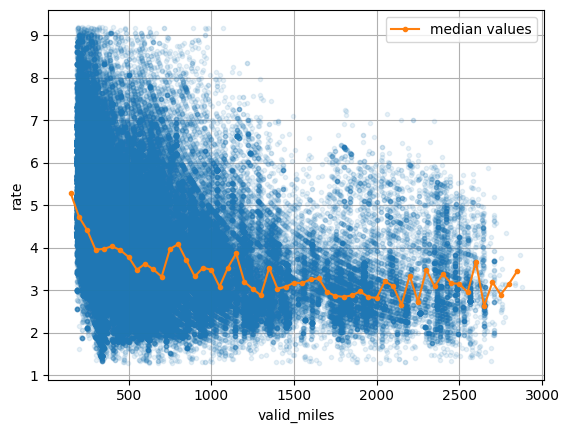

In [171]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    c("valid_miles") > c("valid_miles").quantile(0.25),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="valid_miles",
            values=list(map(myround, weight_rate_stats["valid_miles"].to_list())),
        ),
    )
    .group_by("valid_miles")
    .agg(c("rate").median())
    .sort("valid_miles")
)
plt.plot(
    weight_rate_stats["valid_miles"],
    weight_rate_stats["rate"],
    ".",
    alpha=0.1,
)
plt.plot(
    weight_rate_stats_grouped["valid_miles"],
    weight_rate_stats_grouped["rate"],
    ".-",
    label="median values",
)
plt.xlabel("valid_miles")
plt.ylabel("rate")
plt.legend()
plt.grid()

/var/folders/v_/vqhfnf3s4sb7g6nfby7hc9sr0000gn/T/ipykernel_64976/2048506708.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


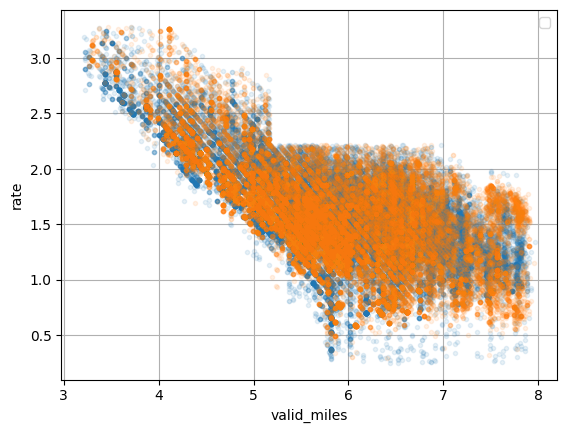

In [218]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("valid_miles") > c("valid_miles").quantile(0.25),
    # c("transport_type") == "GJROY",
    c("pickup_date") < datetime.strptime("2020-05-01", "%Y-%m-%d"),
)
plt.plot(
    weight_rate_stats["valid_miles"].log(),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)
weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("valid_miles") > c("valid_miles").quantile(0.25),
    # c("transport_type") == "GJROY",
    c("pickup_date") > datetime.strptime("2022-05-01", "%Y-%m-%d"),
)
plt.plot(
    weight_rate_stats["valid_miles"].log(),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)
plt.xlabel("valid_miles")
plt.ylabel("rate")
plt.legend()
plt.grid()

In [187]:
weight_rate_stats.describe()

statistic,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma,hour
str,f64,f64,str,f64,str,str,str,f64
"""count""",295941.0,295941.0,"""295941""",295941.0,"""295941""","""295941""","""295941""",295941.0
"""null_count""",0.0,0.0,"""0""",0.0,"""0""","""0""","""0""",0.0
"""mean""",5.184477,455.476947,null,23119.678637,"""2021-05-01 03:18:06.537384""",null,null,11.145313
"""std""",2.649824,447.438595,null,12507.527779,null,null,null,6.225566
"""min""",1.2884,24.7801,"""GJROY""",4800.95,"""2019-11-10 10:42:00""","""ANCVH""","""ANCVH""",0.0
"""25%""",3.5205,185.4518,null,12422.8,"""2020-08-13 22:12:00""",null,null,10.0
"""50%""",4.5741,304.7029,null,19050.0,"""2021-05-24 10:42:00""",null,null,10.0
"""75%""",6.0111,550.067,null,37670.0,"""2022-01-16 18:42:00""",null,null,16.0
"""max""",26.6116,2876.4469,"""MKPFX""",43738.6,"""2022-09-05 20:42:00""","""ZYKLC""","""ZYKLC""",23.0


In [211]:
from datetime import datetime

In [210]:
weight_rate_stats.describe()

statistic,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma,hour
str,f64,f64,str,f64,str,str,str,f64
"""count""",295941.0,295941.0,"""295941""",295941.0,"""295941""","""295941""","""295941""",295941.0
"""null_count""",0.0,0.0,"""0""",0.0,"""0""","""0""","""0""",0.0
"""mean""",5.184477,455.476947,null,23119.678637,"""2021-05-01 03:18:06.537384""",null,null,11.145313
"""std""",2.649824,447.438595,null,12507.527779,null,null,null,6.225566
"""min""",1.2884,24.7801,"""GJROY""",4800.95,"""2019-11-10 10:42:00""","""ANCVH""","""ANCVH""",0.0
"""25%""",3.5205,185.4518,null,12422.8,"""2020-08-13 22:12:00""",null,null,10.0
"""50%""",4.5741,304.7029,null,19050.0,"""2021-05-24 10:42:00""",null,null,10.0
"""75%""",6.0111,550.067,null,37670.0,"""2022-01-16 18:42:00""",null,null,16.0
"""max""",26.6116,2876.4469,"""MKPFX""",43738.6,"""2022-09-05 20:42:00""","""ZYKLC""","""ZYKLC""",23.0


In [209]:
(weight_rate_stats.filter(c("valid_miles").log() > 6)).describe()

statistic,rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma,hour
str,f64,f64,str,f64,str,str,str,f64
"""count""",106148.0,106148.0,"""106148""",106148.0,"""106148""","""106148""","""106148""",106148.0
"""null_count""",0.0,0.0,"""0""",0.0,"""0""","""0""","""0""",0.0
"""mean""",3.752244,881.147814,null,27860.939368,"""2021-05-03 03:45:02.421128""",null,null,11.012417
"""std""",1.21679,508.463835,null,12749.169223,null,null,null,6.545682
"""min""",1.2884,403.4395,"""GJROY""",4800.95,"""2019-11-10 10:42:00""","""ANCVH""","""ANCVH""",0.0
"""25%""",2.8342,521.1954,null,15116.05,"""2020-07-23 21:33:20""",null,null,10.0
"""50%""",3.551,700.032,null,31581.45,"""2021-06-09 10:42:00""",null,null,10.0
"""75%""",4.5005,1039.9053,null,39950.0,"""2022-01-27 23:42:00""",null,null,12.0
"""max""",9.1923,2876.4469,"""MKPFX""",43738.6,"""2022-09-05 20:42:00""","""ZYKLC""","""ZYKLC""",23.0


In [ ]:
def myround(x, base=50):
    return base * np.floor(x / base)


weight_rate_stats = train.filter(
    c("rate") < c("rate").quantile(0.999),
    # c("valid_miles") > c("valid_miles").quantile(0.25),
)
weight_rate_stats_grouped = (
    weight_rate_stats.with_columns(
        pl.Series(
            name="valid_miles",
            values=list(map(myround, weight_rate_stats["valid_miles"].to_list())),
        ),
    )
    .group_by("valid_miles")
    .agg(c("rate").median())
    .sort("valid_miles")
)
plt.plot(
    weight_rate_stats["valid_miles"].log(),
    weight_rate_stats["rate"].log(),
    ".",
    alpha=0.1,
)
# plt.plot(
#     weight_rate_stats_grouped["valid_miles"].log(),
#     weight_rate_stats_grouped["rate"].log(),
#     ".-",
#     label="median values",
# )
plt.xlabel("valid_miles")
plt.ylabel("rate")
plt.legend()
plt.grid()

## category visualizations

### transport_type splits

In [68]:
train["transport_type"].unique().to_list()

['KFEGT', 'MKPFX', 'GJROY']

In [73]:
transport_types = ["MKPFX", "GJROY", "KFEGT"]

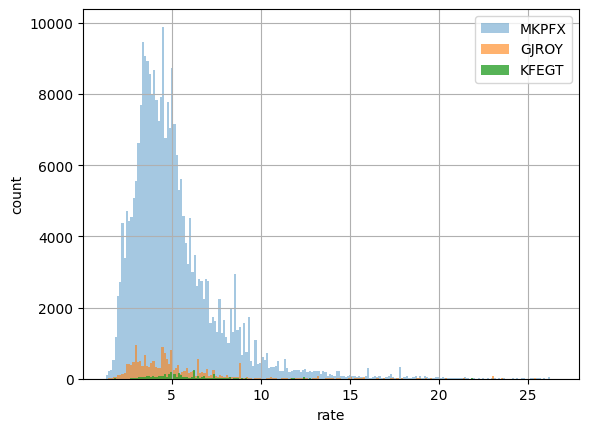

In [74]:
for i, transport_type in enumerate(transport_types):
    plt.hist(
        train.filter(
            c("transport_type") == transport_type,
            c("rate") < c("rate").quantile(0.999),
        )["rate"],
        bins=200,
        alpha=0.4 + i * 0.2,
        label=transport_type,
    )
plt.xlabel("rate")
plt.ylabel("count")
plt.legend()
plt.grid()

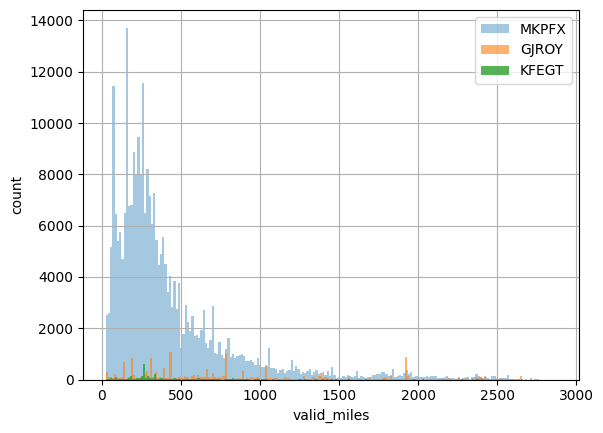

In [76]:
for i, transport_type in enumerate(transport_types):
    plt.hist(
        train.filter(
            c("transport_type") == transport_type,
            # c("rate") < c("rate").quantile(0.999),
        )["valid_miles"],
        bins=200,
        alpha=0.4 + i * 0.2,
        label=transport_type,
    )
plt.xlabel("valid_miles")
plt.ylabel("count")
plt.legend()
plt.grid()

In [100]:
train.sample()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
f64,f64,str,f64,datetime[μs],str,str
8.6046,93.1588,"""MKPFX""",8980.0,2021-04-14 19:42:00,"""PEXPT""","""QUERU"""


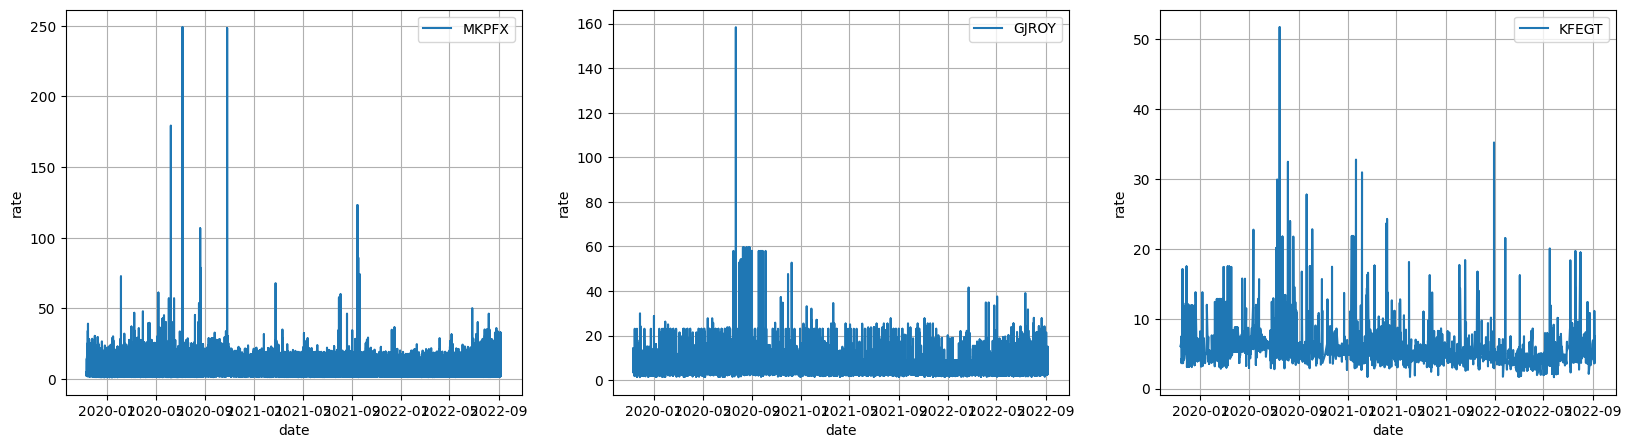

In [104]:
size = len(transport_types)
fig, ax = plt.subplots(1, size, figsize=(20, 5))

for i, transport_type in enumerate(transport_types):
    k = train.filter(
        c("transport_type") == transport_type,
        # c("rate") < c("rate").quantile(0.999),
    )
    ax[i].plot(
        k["pickup_date"],
        k["rate"],
        label=transport_type,
    )
    ax[i].set_xlabel("date")
    ax[i].set_ylabel("rate")
    ax[i].legend()
    ax[i].grid()

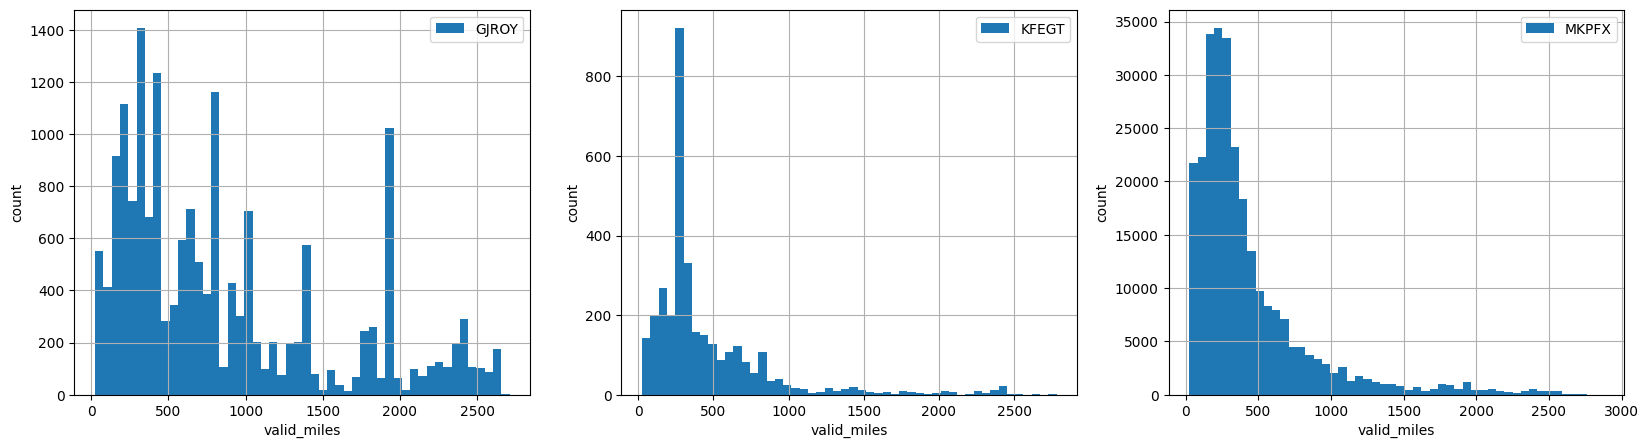

In [61]:
size = len(transport_types)
fig, ax = plt.subplots(1, size, figsize=(20, 5))

for i, transport_type in enumerate(transport_types):
    ax[i].hist(
        train.filter(
            c("transport_type") == transport_type,
            # c("rate") < c("rate").quantile(0.999),
        )["valid_miles"],
        bins=50,
        label=transport_type,
    )
    ax[i].set_xlabel("valid_miles")
    ax[i].set_ylabel("count")
    ax[i].legend()
    ax[i].grid()

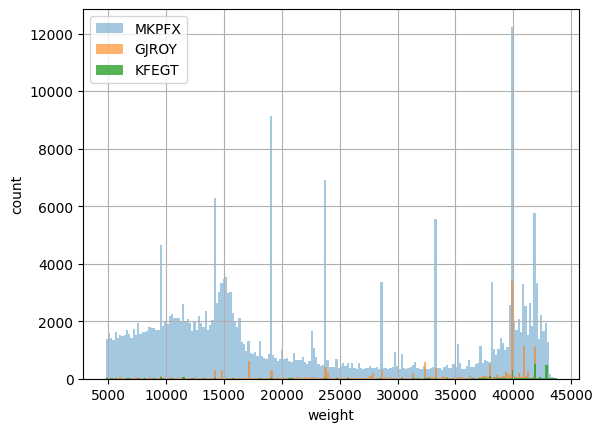

In [82]:
for i, transport_type in enumerate(transport_types):
    plt.hist(
        train.filter(
            c("transport_type") == transport_type,
            c("weight") < c("weight").quantile(0.999),
        )["weight"],
        bins=200,
        alpha=0.4 + i * 0.2,
        label=transport_type,
    )
plt.xlabel("weight")
plt.ylabel("count")
plt.legend()
plt.grid()

### kma

In [84]:
train.sample()

rate,valid_miles,transport_type,weight,pickup_date,origin_kma,destination_kma
f64,f64,str,f64,datetime[μs],str,str
3.3216,910.1076,"""MKPFX""",12657.45,2021-06-21 10:42:00,"""AVEJW""","""VCEUE"""


In [113]:
kma_statistics = train.group_by("destination_kma").agg(
    c("valid_miles").median(),
    c("rate").median(),
    c("weight").median(),
)

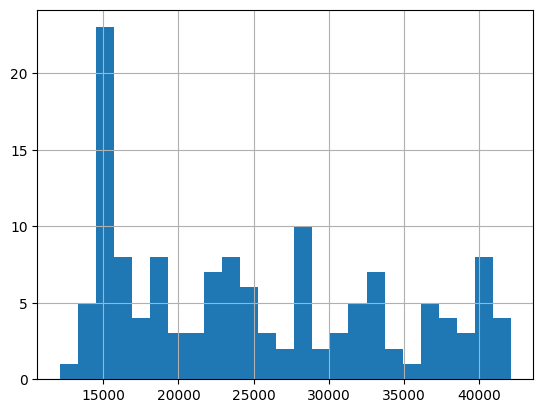

In [114]:
plt.hist(kma_statistics["weight"], bins=25)
plt.grid()

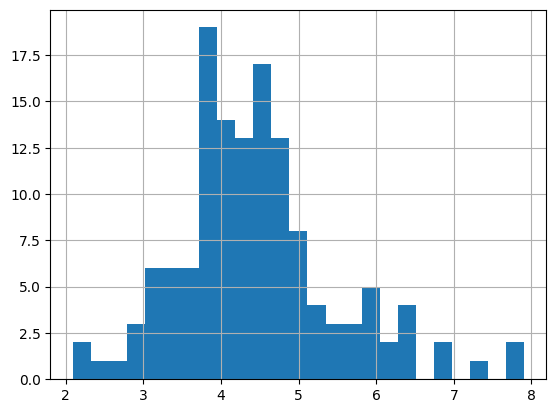

In [115]:
plt.hist(kma_statistics["rate"], bins=25)
plt.grid()

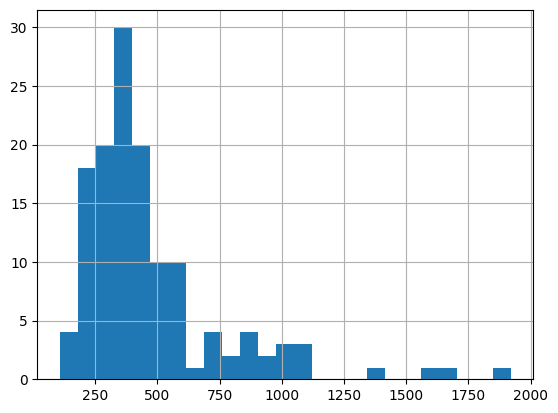

In [116]:
plt.hist(kma_statistics["valid_miles"], bins=25)
plt.grid()

### time

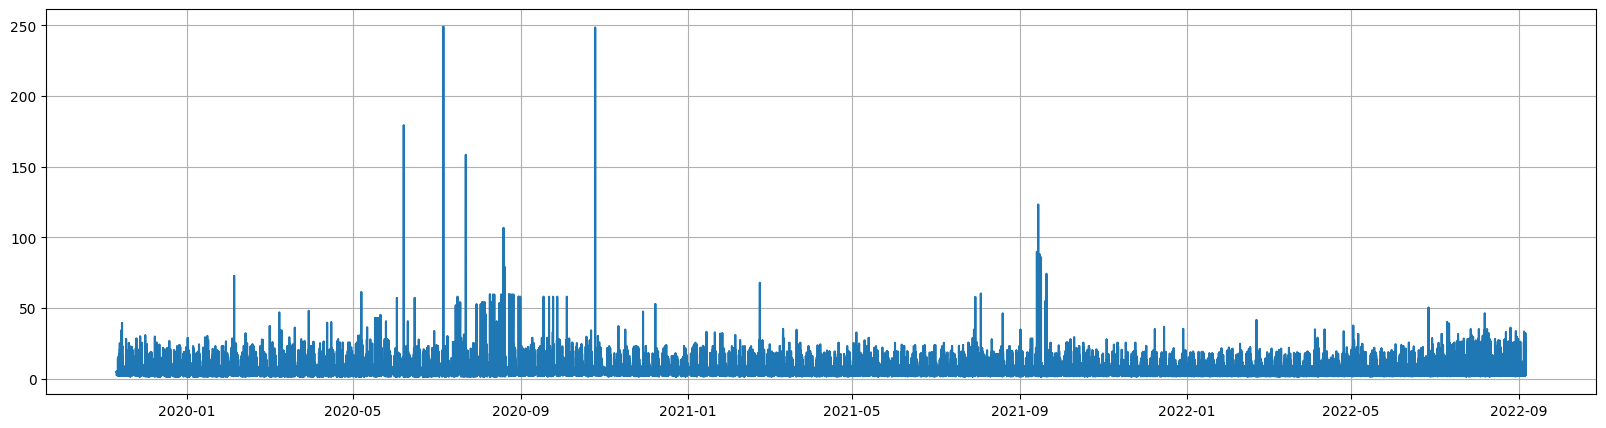

In [107]:
train.sample(3)
plt.figure(figsize=(20, 5))
plt.plot(
    train["pickup_date"],
    train["rate"],
)
plt.grid()

In [110]:
train = train.with_columns(c("pickup_date").dt.hour().alias("hour"))

In [121]:
stats_by_hour = (
    train.group_by("hour")
    .agg(
        c("valid_miles").median(),
        c("valid_miles").count().alias("count_samples"),
        c("rate").median(),
        c("weight").median(),
    )
    .sort("hour")
)

In [122]:
stats_by_hour

hour,valid_miles,count_samples,rate,weight
i8,f64,u32,f64,f64
0,478.333,12720,4.313,28045.55
1,388.621,10317,4.423,21994.05
2,315.73,9572,4.6565,15317.45
3,272.2624,19276,4.6615,14962.15
4,216.673,5201,5.0703,14757.9
…,…,…,…,…
19,259.126,8723,4.7332,17707.65
20,321.871,7210,4.4903,19050.0
21,365.036,7479,4.3507,23800.0


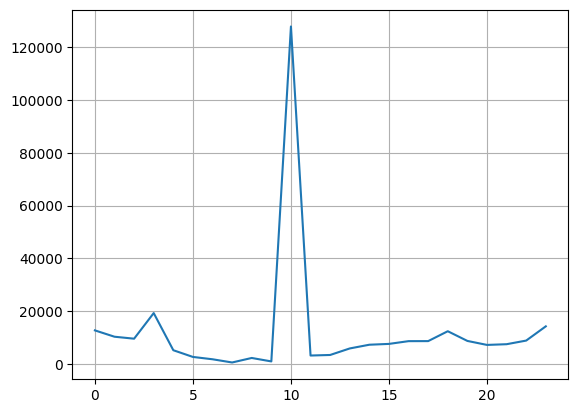

In [130]:
train.sample(3)
# plt.figure(figsize=(20, 5))
plt.plot(
    stats_by_hour["hour"],
    stats_by_hour["count_samples"],
)
plt.grid()

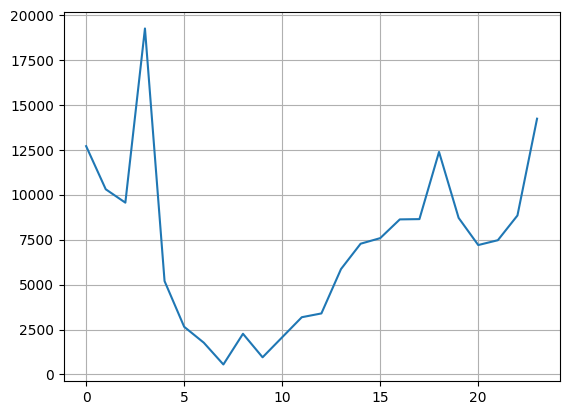

In [129]:
train.sample(3)
# plt.figure(figsize=(20, 5))
plt.plot(
    stats_by_hour.filter(c("hour") != 10)["hour"],
    stats_by_hour.filter(c("hour") != 10)["count_samples"],
)
plt.grid()

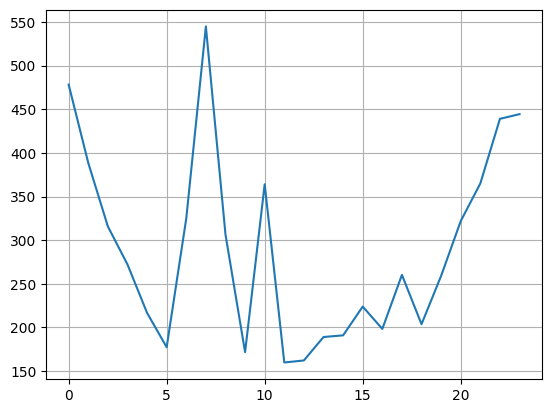

In [125]:
train.sample(3)
# plt.figure(figsize=(20, 5))
plt.plot(
    stats_by_hour["hour"],
    stats_by_hour["valid_miles"],
)
plt.grid()

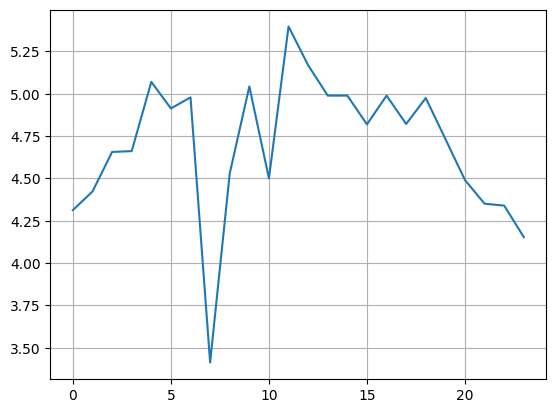

In [124]:
train.sample(3)
# plt.figure(figsize=(20, 5))
plt.plot(
    stats_by_hour["hour"],
    stats_by_hour["rate"],
)
plt.grid()